# 18IT010 Yagnik Bavishi

Dataset : MNIST Dataset

The mnist dataset is conveniently provided to us as part of the Keras library, so we can easily load the dataset. Out of the 70,000 images provided in the dataset, 60,000 are given for training and 10,000 are given for testing.



In [23]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_drawing = x_train

In [25]:
trainX = x_train.reshape((x_train.shape[0], 28, 28, 1))
testX = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [26]:
trainY = keras.utils.to_categorical(y_train)
testY = keras.utils.to_categorical(y_test)

In [27]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
mnist_train=model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX, testY))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.3840 - accuracy: 0.9094 - val_loss: 0.1299 - val_accuracy: 0.9639
Epoch 2/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1162 - accuracy: 0.9669 - val_loss: 0.0947 - val_accuracy: 0.9721
Epoch 3/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0952 - accuracy: 0.9723 - val_loss: 0.0906 - val_accuracy: 0.9724
Epoch 4/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0823 - accuracy: 0.9748 - val_loss: 0.0845 - val_accuracy: 0.9748
Epoch 5/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0756 - accuracy: 0.9769 - val_loss: 0.0815 - val_accuracy: 0.9748


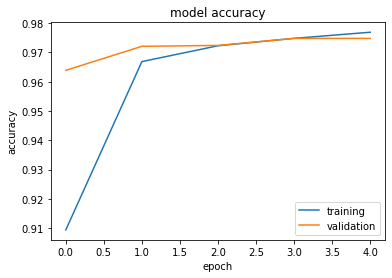

In [33]:
plt.plot(mnist_train.history['accuracy'])
plt.plot(mnist_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## Using two Conv2D

In [34]:
model1 = Sequential()
model1.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model1.add(Conv2D(32, kernel_size=3, activation='relu'))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [35]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
mnist_train1=model1.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 224s 4ms/step - loss: 0.1330 - accuracy: 0.9616 - val_loss: 0.0781 - val_accuracy: 0.9772
Epoch 2/5
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0634 - accuracy: 0.9804 - val_loss: 0.0783 - val_accuracy: 0.9760
Epoch 3/5
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0865 - val_accuracy: 0.9761
Epoch 4/5
60000/60000 [==============================] - 214s 4ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.1065 - val_accuracy: 0.9732
Epoch 5/5
60000/60000 [==============================] - 213s 4ms/step - loss: 0.0250 - accuracy: 0.9918 - val_loss: 0.0989 - val_accuracy: 0.9775


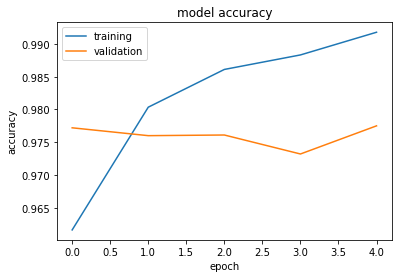

In [38]:
plt.plot(mnist_train1.history['accuracy'])
plt.plot(mnist_train1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()